In [1]:
from modules import constants as cnst
from modules import ana_moment_fit
from modules import ml_moment_fit as mlfit
import math
from scipy.interpolate import interp1d
%pylab notebook

figpath="./figures/"
!mkdir $figpath

Populating the interactive namespace from numpy and matplotlib
mkdir: ./figures/: File exists


# Construct 2 MBB SED

In [2]:
def mbb(nu,T,A,alpha,nu0=1.):
    x=cnst.planck_const*nu*cnst.ghz2hz/(cnst.boltzman_const*T)
    Inu=A*((nu/nu0)**alpha)*(nu**3.)/(np.exp(x)-1.)
    return Inu

def multitemp_mbb_spectra(nu,T1,A1,alpha1,T2,A2,alpha2,nu0=1.):
    Inu=mbb(nu,T1,A1,alpha1,nu0=nu0) + mbb(nu,T2,A2,alpha2,nu0=nu0)
    return Inu

f=0.34188
T1=9.75 ; A1=f; alpha1=1.63; T2=15.7 ; A2 =(1.-f); alpha2=2.82

Abar=A1+A2
Tbar=Abar/((A1/T1)+(A2/T2))
nu0=cnst.boltzman_const*Tbar/cnst.planck_const/cnst.ghz2hz
print Abar,Tbar,nu0

#nu=[100.,143.,217.,353.,545., 857.] ; nu=np.array(nu)
nu_min=10. ; nu_max=3000.

# Logarithmic spacing
nu=logspace(np.log10(nu_min),np.log10(nu_max),100) ; nu[0]=nu_min ; nu[-1]=nu_max
Inu=multitemp_mbb_spectra(nu,T1,A1,alpha1,T2,A2,alpha2,nu0=3000.)
#t_nu=logspace(np.log10(nu_min),np.log10(nu_max),2000) ; t_nu[0]=nu_min ; t_nu[-1]=nu_max
#t_Inu=multitemp_mbb_spectra(t_nu,T1,A1,alpha1,T2,A2,alpha2,nu0=3000.)

# # Linear spacing
nu=linspace(nu_min,nu_max,100)
Inu=multitemp_mbb_spectra(nu,T1,A1,alpha1,T2,A2,alpha2,nu0=3000.)
# t_nu=linspace(nu_min,nu_max,500)
# t_Inu=multitemp_mbb_spectra(t_nu,T1,A1,alpha1,T2,A2,alpha2,nu0=3000.)

# fn=interp1d(nu,Inu,kind="quadratic") ; norm=3388/fn(100.)
# Inu=Inu*norm ; t_Inu=t_Inu*norm
# quad_spline_fn=interp1d(nu,Inu,kind="quadratic")
# cub_spline_fn=interp1d(nu,Inu,kind="cubic")
#figure()
#plot(nu,Inu)
#plot(nu,mbb(nu,T1,A1,alpha1,nu0=3000.),"b--",lw=2)
#plot(nu,mbb(nu,T2,A2,alpha2,nu0=3000.),"r--",lw=2)
#loglog()
#ylabel(r"$I_{\nu}$")
#xlabel(r"$\nu$[GHz]")
#grid()
#legend(loc=0)
#xticks([100,353,545,857,3000],[100,353,545,857,3000])

mf=ana_moment_fit.moment_fit(8)

1.0 12.9898662496 270.664805898


<IPython.core.display.Javascript object>


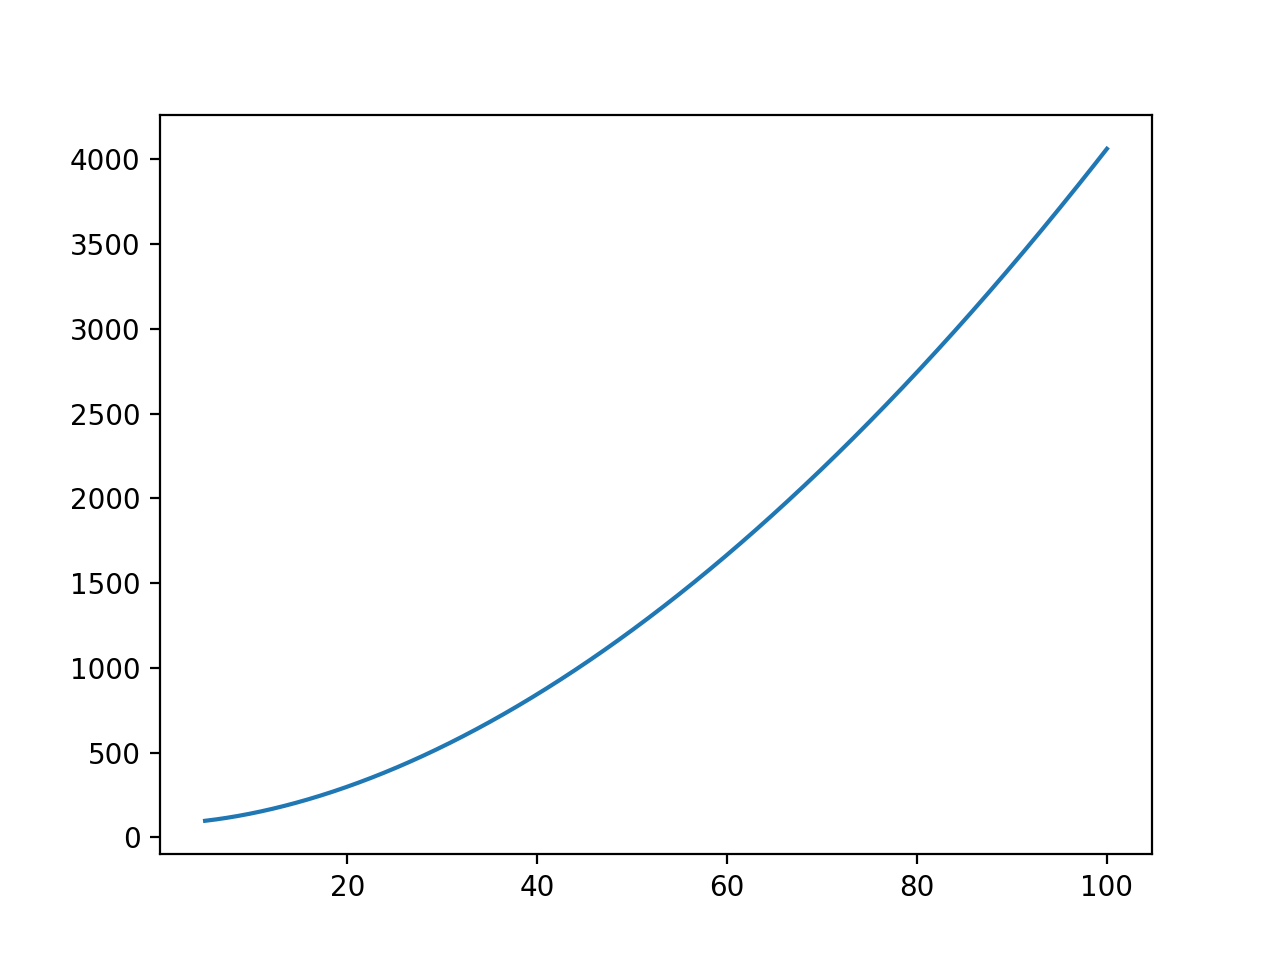

In [197]:
figure()
nu=linspace(5,100,1000)
plot(nu,(80*nu**(-3.) + nu**(-1.2))*(nu**3.))
#plot(nu,80.*nu**(-3.),"--")
#plot(nu,nu**(-1.5))
#loglog()

In [3]:
par0=mf.fit_monopole_sed(nu,Inu,0,bounds_true=True,prange=10,maxfev=200000) ; print par0
par2=mf.fit_monopole_sed(nu,Inu,2,bounds_true=True,prange=10,maxfev=200000) ; print par2
par3=mf.fit_monopole_sed(nu,Inu,3,bounds_true=True,maxfev=500000) ; print par3

[  3.81711662e-03   1.79714227e+01   1.93452624e+00]
[  3.85369076e-03   1.53739458e+01   1.22044855e+00  -5.87494423e-01
  -2.31033176e-01   2.09217589e-01]
[  4.42379966e-03   1.38974529e+01   1.93665832e+00  -1.85846790e-01
   1.40609660e-01   6.07695433e-02  -8.13179367e-02  -4.29046698e-01
  -1.17687064e-01  -4.17297251e-02]


In [11]:
mlsoln=mlfit.ml_moment_fit(12)
print par0[1],par0[2]

17.9714227478 1.93452623639


In [160]:
moments,cov,rec_inu_0=mlsoln.get_ml_moment_soln(nu,20.,2.,3,Inu,inc_1der=True)
#moments,cov,rec_inu_2=mlsoln.get_ml_moment_soln(nu,par0[1],par2[2],3,Inu,inc_1der=True)
#moments,cov,rec_inu_3=mlsoln.get_ml_moment_soln(nu,par0[1],par3[2],3,Inu,inc_1der=True)
print moments

[ 0.31996918 -0.10531235  0.17250824  0.07215118 -0.14031219 -0.02333021
 -0.00459146  0.0619545   0.01064229  0.00108266]


In [140]:
moments

array([ 0.06326294, -0.02235794,  0.02898407,  0.01131439, -0.02655792,
       -0.00690079, -0.00201178,  0.00966644,  0.0023675 ,  0.00016516])

<IPython.core.display.Javascript object>


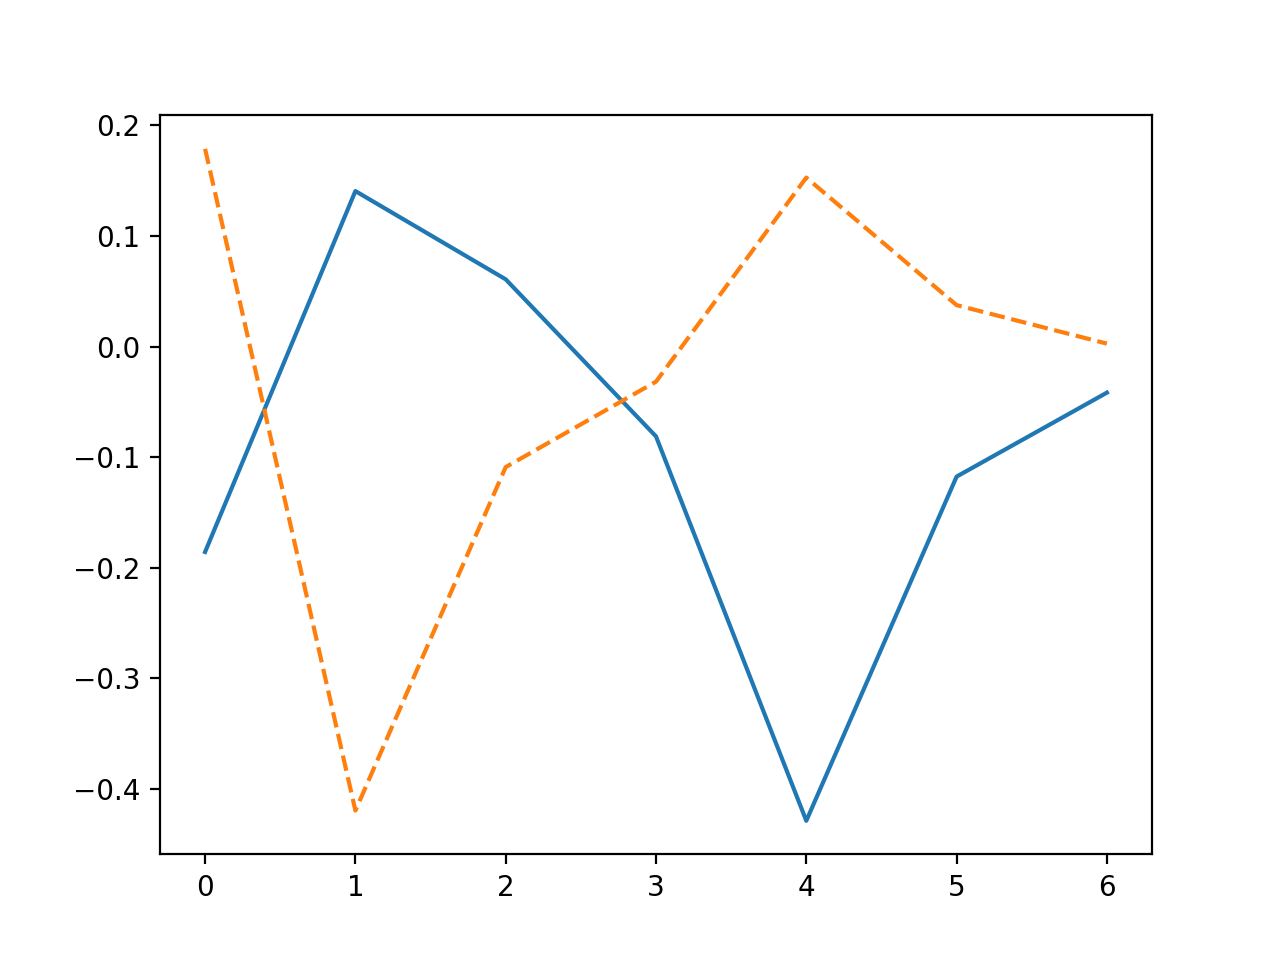

In [143]:
figure()
plot(par3[3:])
plot(moments[3:]/moments[0],"--")

In [107]:
nrlz=1000
dt=[] ; da=[]
for i in range(nrlz):
    if i==0:
        T1=par0[1] ; alpha1=par0[2]
    else:
        T1=T1-moments[1] ; alpha1=alpha1-moments[2]
    #print par0[1],par0[2]
    #print moments[1],moments[2]
    print T1,alpha1,moments[0]
    moments,cov,rec_inu_0=mlsoln.get_ml_moment_soln(nu,T1,alpha1,3,Inu,inc_1der=False)
    dt=append(dt,moments[1]) ; da=append(da,moments[2])
print moments

17.9714227478 1.93452623639 0.0127045302652
17.9937806885 1.90554216656 0.0632629394531
18.0128351013 1.88179949078 0.0540161132812
18.029535846 1.86216142926 0.047004699707
18.0442224304 1.84559801373 0.0414428710938
18.0571389954 1.83220842633 0.0361633300781
18.0687166016 1.82113054547 0.0321960449219
18.0789094727 1.81218126568 0.0284118652344
18.0879846375 1.80502107892 0.0252380371094
18.0961786072 1.7991884068 0.0227355957031
18.1036706726 1.79451540265 0.0208435058594
18.1106019775 1.79071977887 0.0193328857422
18.1174226563 1.7874620274 0.0187377929688
18.1237169067 1.78472307477 0.0175628662109
18.1297860901 1.7824495152 0.0168533325195
18.1357141296 1.78041246686 0.0164566040039
18.1414171021 1.77871492657 0.0159149169922
18.1469674866 1.7771356419 0.0156555175781
18.152544574 1.77567461285 0.0156402587891
18.1580796997 1.77424410138 0.0155334472656
18.1634507935 1.77296999249 0.0151672363281
18.1686273377 1.77179125103 0.0148773193359
18.1738343994 1.77065828595 0.015037536

<IPython.core.display.Javascript object>


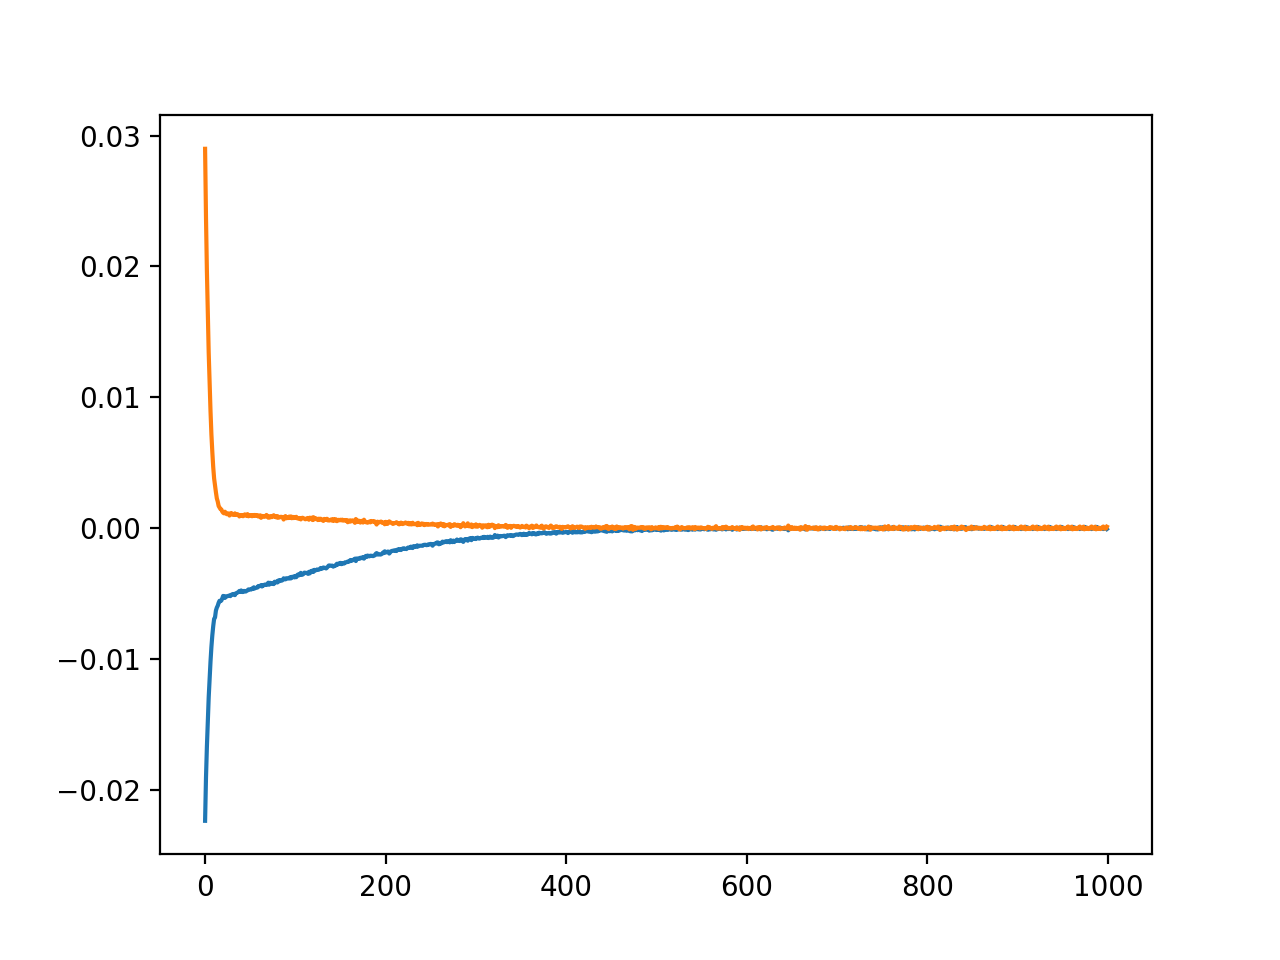

In [108]:
figure()
plot(dt)
plot(da)

<IPython.core.display.Javascript object>


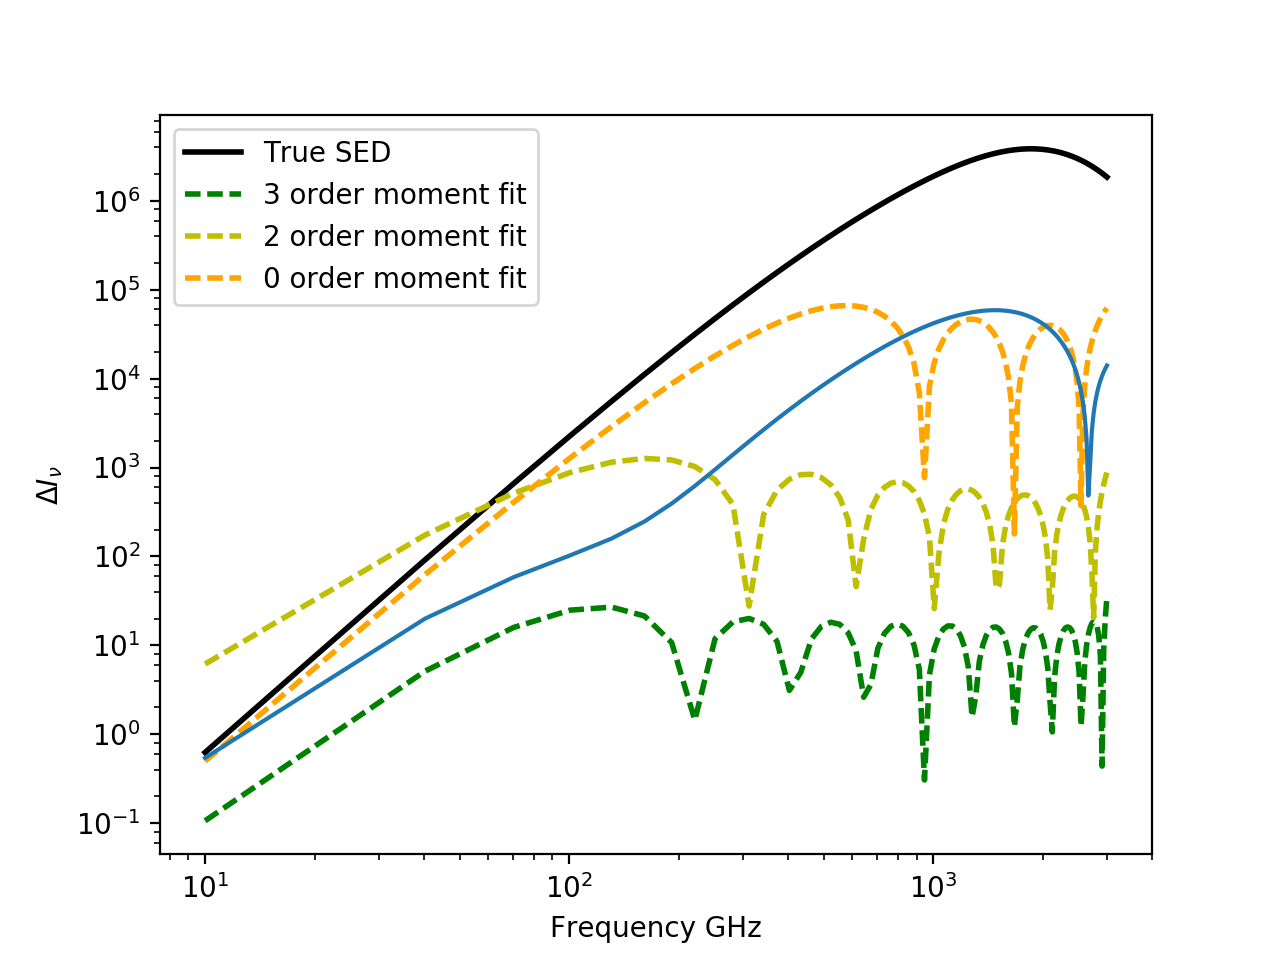

[]

In [161]:
figure()
plot(nu,Inu,"k-",lw=2,label="True SED")
#plot(nu,abs(Inu-rec_inu_0),"r-",lw=2,label=r"ML solution around 0 order fitted T,$\alpha$")
#plot(nu,abs(Inu-rec_inu_2),"b-",lw=2,label=r"ML solution around 2 order fitted T,$\alpha$")
#plot(nu,abs(Inu-rec_inu_3),"m-",lw=2,label=r"ML solution around 3 order fitted T,$\alpha$")
plot(nu,abs(Inu-mf.moment_expansion_function(nu,*par3)),"g--",lw=2,label="3 order moment fit")
plot(nu,abs(Inu-mf.moment_expansion_function(nu,*par2)),"y--",lw=2,label="2 order moment fit")
plot(nu,abs(Inu-mf.moment_expansion_function(nu,*par0)),"--",color="orange",lw=2,label="0 order moment fit")
plot(nu,abs(Inu-rec_inu_0))
xlabel("Frequency GHz")
ylabel(r"$\Delta I_{\nu}$")
legend(loc=0)
loglog()

# Add noise to SED

<IPython.core.display.Javascript object>


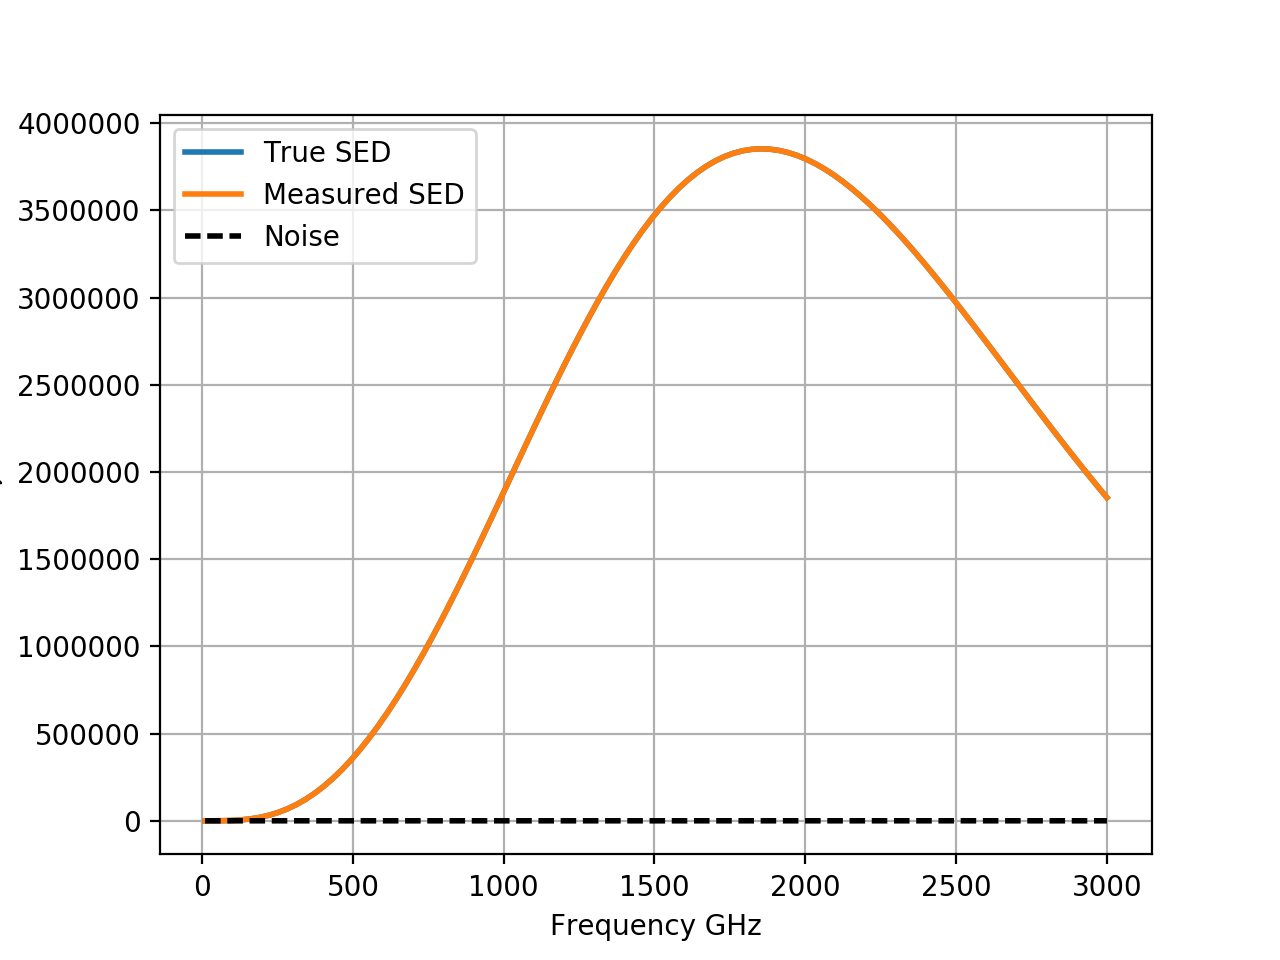

In [102]:
#sigma=1e-5*abs(nu)**3.*exp(-1e-6*abs(nu-20)**1.8)
sigma=1e-5*abs(nu)**2
#sigma=0.01*Inu
noise=random.normal(0,1,size=size(nu))*sigma
nInu=Inu+noise
figure()
plot(nu,Inu,lw=2,label="True SED")
plot(nu,nInu,lw=2,label="Measured SED")
plot(nu,sigma,"k--",lw=2,label="Noise")
xlabel("Frequency GHz")
ylabel(r"$I_{\nu}$")
legend(loc=0)
grid()
savefig(figpath + "model_sed.pdf",bbox_inches="tight")
noise=random.normal(size(nu))

In [103]:
par0=mf.fit_monopole_sed(nu,nInu,0,bounds_true=True,prange=10,maxfev=200000,err=sigma) ; print par0
par2=mf.fit_monopole_sed(nu,nInu,2,bounds_true=True,prange=10,maxfev=200000,err=sigma) ; print par2
#par3=mf.fit_monopole_sed(nu,nInu,3,bounds_true=True,maxfev=500000,err=sigma) ; print par3

[  5.05221171e-03   2.04505510e+01   1.49183136e+00]
[  2.85406142e-04   1.75545733e+01   3.28797183e-01   2.37978250e+00
  -7.16955627e+00   9.99999994e+00]


In [8]:
moments,cov,rec_inu_0=mlsoln.get_ml_moment_soln(nu,par0[1],par0[2],3,Inu,inc_1der=False)
print moments

NameError: name 'mlsoln' is not defined

<IPython.core.display.Javascript object>


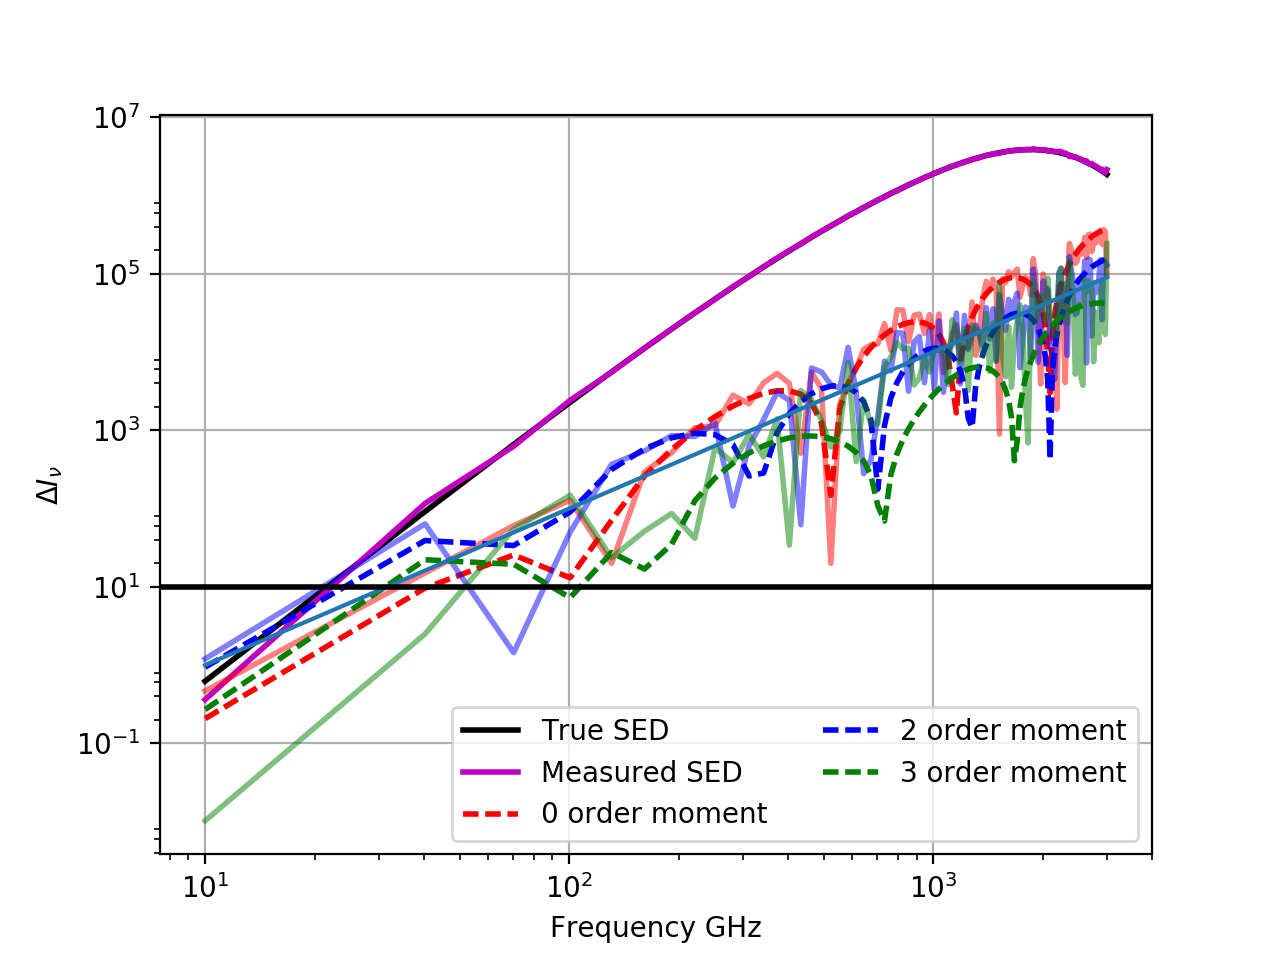

In [5]:
x0=nu ; y0=Inu
figure()
plot(nu,Inu,"k-",lw=2,label="True SED")
plot(nu,nInu,"m-",lw=2,label="Measured SED")
plot(x0,abs(Inu-mf.moment_expansion_function(x0,*par0)),"r--",lw=2,label="0 order moment")
plot(x0,abs(nInu-mf.moment_expansion_function(x0,*par0)),"r-",alpha=0.5,lw=2,label="")
plot(x0,abs(Inu-mf.moment_expansion_function(x0,*par2)),"b--",lw=2,label="2 order moment")
plot(x0,abs(nInu-mf.moment_expansion_function(x0,*par2)),"b-",alpha=0.5,lw=2,label="")
plot(x0,abs(Inu-mf.moment_expansion_function(x0,*par3)),"g--",lw=2,label="3 order moment")
plot(x0,abs(nInu-mf.moment_expansion_function(x0,*par3)),"g-",alpha=0.5,lw=2,label="")
#plot(x0,abs(y0-mf.moment_expansion_function(x0,*opar3)),"g-",lw=2,label="3 order moment")
plot(nu,sigma)
axhline(10.,color="black",linewidth=2)
legend(loc=0,fontsize=10.,ncol=2)
loglog()
grid()
xlabel("Frequency GHz")
ylabel(r"$\Delta I_{\nu}$")
savefig(figpath + "moment_fit_noisy_spectra.pdf",dpi=150,bbox_inches="tight")

In [122]:
T=par3[1] ; slope=par3[2]
nu0=cnst.boltzman_const*T/cnst.planck_const/cnst.ghz2hz  # Pivot frequency in GHz
c0=cnst.planck_const*cnst.ghz2hz/cnst.boltzman_const

num_moments=10
cov_v=zeros((num_moments,num_moments),float)
vecs=zeros((num_moments,size(nu)),float)
vdoti=[]

for i in range(num_moments):
    k=i
    if i>0:
        k=i+2
    vecs[i,:]=mf.ana_sed.fn_dir[k](nu,1./T,slope,nu0,c0)
    vdoti=append(vdoti,np.dot(nInu/sigma**2.,vecs[i,:]))
    for j in range(i+1):
        cov_v[i,j]=np.dot(vecs[i,:],vecs[j,:]/sigma**2.)
        cov_v[j,i]=cov_v[i,j]
        
coeffs=np.asarray(np.matmul(np.linalg.inv(np.matrix(cov_v)),np.transpose(np.matrix(vdoti)))).flatten()

recInu=0.
for i in range(num_moments):
    recInu=recInu+coeffs[i]*vecs[i,:]

In [123]:
np.linalg.lstsq(cov_v,vdoti)

(array([-0.0190644 ,  0.00518116,  0.00478276,  0.01453177,  0.00055605,
         0.00903971, -0.00033913,  0.00033474, -0.00047615,  0.00247984]),
 array([], dtype=float64),
 10,
 array([  4.68445833e+17,   2.72385543e+16,   9.48233234e+15,
          4.76537640e+15,   7.71930913e+14,   7.85312926e+13,
          5.45824215e+12,   1.49173021e+11,   9.27476493e+08,
          1.25898753e+08]))

In [124]:
coeffs

array([-0.0190644 ,  0.00518116,  0.00478276,  0.01453177,  0.00055605,
        0.00903971, -0.00033913,  0.00033474, -0.00047615,  0.00247984])

In [104]:
mlsoln=mlfit.ml_moment_fit(8)
#y=mlsoln.get_best_fit_param(nu,Inu,sigma,n=2,inc_1der=False,guess=[10.,1.])
moments,cov,rec_inu_0=mlsoln.get_ml_moment_soln(nu,par0[1],par0[2],3,nInu,err_Inu=sigma,inc_1der=True)
moments,cov,rec_inu_2=mlsoln.get_ml_moment_soln(nu,par2[1],par2[2],3,nInu,err_Inu=sigma,inc_1der=True)
moments,cov,rec_inu_3=mlsoln.get_ml_moment_soln(nu,par3[1],par3[2],3,nInu,err_Inu=sigma,inc_1der=True)

In [105]:
print par3[3:]
print moments/7.15105091e-05

[ 45.59576482   5.24041333  33.77096499   2.19515868  38.59709888
  20.04108409   4.54983799]
[ 4771.83170413 -1188.19692328  2779.29203782  1145.21453704 -1949.82400292
  -166.05830833    63.33083867   830.55493048   112.01484243    10.23671334]


<IPython.core.display.Javascript object>


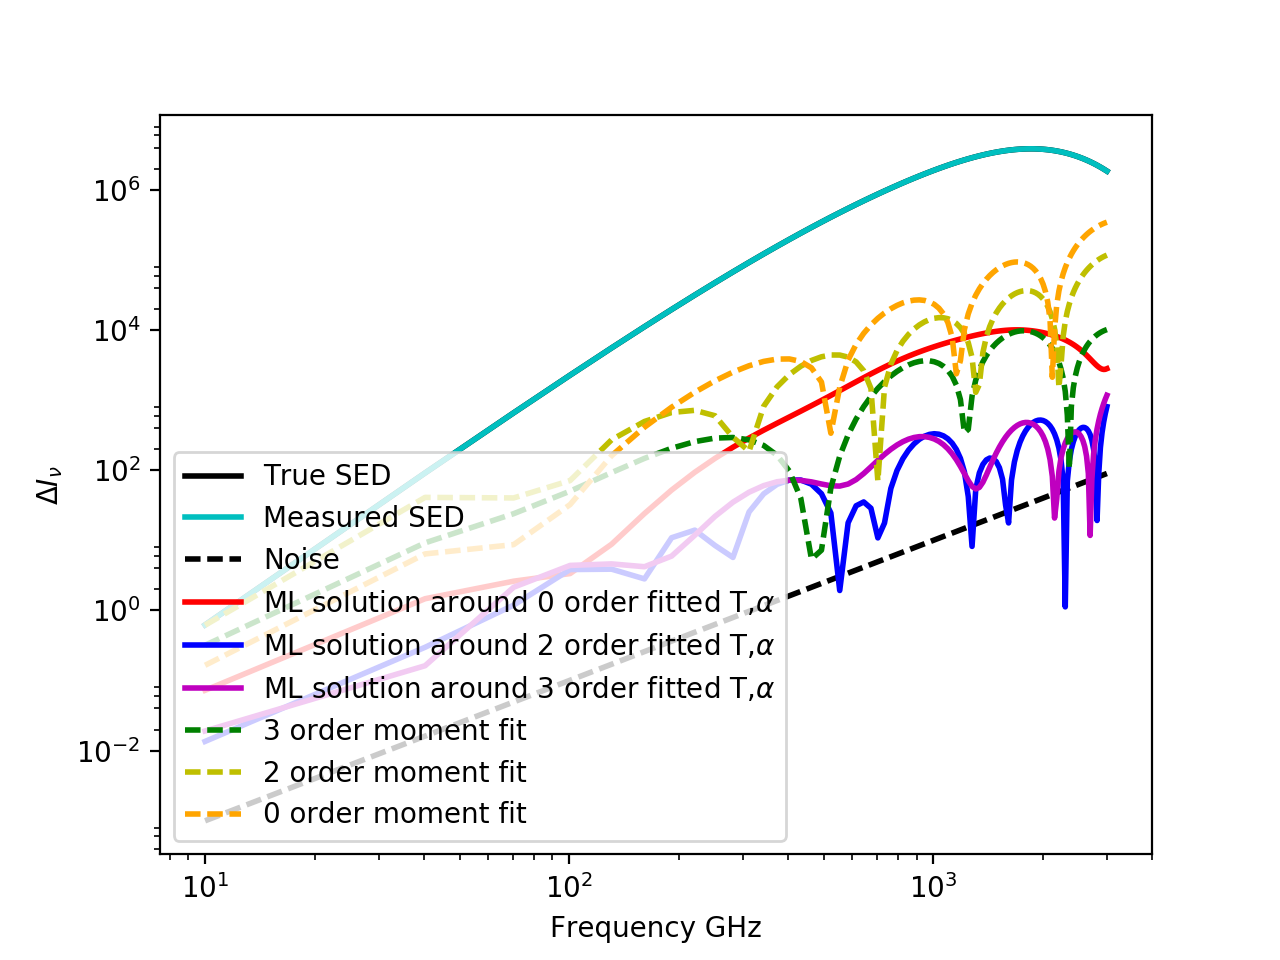

In [106]:
figure()
plot(nu,Inu,"k-",lw=2,label="True SED")
plot(nu,nInu,"c-",lw=2,label="Measured SED")
plot(nu,sigma,"k--",lw=2,label="Noise")
plot(nu,abs(Inu-rec_inu_0),"r-",lw=2,label=r"ML solution around 0 order fitted T,$\alpha$")
plot(nu,abs(Inu-rec_inu_2),"b-",lw=2,label=r"ML solution around 2 order fitted T,$\alpha$")
plot(nu,abs(Inu-rec_inu_3),"m-",lw=2,label=r"ML solution around 3 order fitted T,$\alpha$")
plot(nu,abs(Inu-mf.moment_expansion_function(nu,*par3)),"g--",lw=2,label="3 order moment fit")
plot(nu,abs(Inu-mf.moment_expansion_function(nu,*par2)),"y--",lw=2,label="2 order moment fit")
plot(nu,abs(Inu-mf.moment_expansion_function(nu,*par0)),"--",color="orange",lw=2,label="0 order moment fit")
xlabel("Frequency GHz")
ylabel(r"$\Delta I_{\nu}$")
legend(loc=0)
loglog()
savefig(figpath + "equivalence_all_param_optimization_vs_max_lh_noisy_inc_1der.pdf")

In [9]:
par0=mf.fit_monopole_sed(nu,Inu,0,bounds_true=True,prange=10,maxfev=200000) ; print par0
par2=mf.fit_monopole_sed(nu,Inu,2,bounds_true=True,prange=10,maxfev=200000) ; print par2
par3=mf.fit_monopole_sed(nu,Inu,3,bounds_true=True,maxfev=500000) ; print par3

[  3.81711662e-03   1.79714227e+01   1.93452624e+00]
[  3.85369076e-03   1.53739458e+01   1.22044855e+00  -5.87494423e-01
  -2.31033176e-01   2.09217589e-01]
[  4.42379966e-03   1.38974529e+01   1.93665832e+00  -1.85846790e-01
   1.40609660e-01   6.07695433e-02  -8.13179367e-02  -4.29046698e-01
  -1.17687064e-01  -4.17297251e-02]


In [11]:
moments,cov,rec_inu_0=mlsoln.get_ml_moment_soln(nu,par0[1],par0[2],3,Inu,inc_1der=False)
print moments
moments,cov,rec_inu_2=mlsoln.get_ml_moment_soln(nu,par2[1],par2[2],3,Inu,inc_1der=False)
print moments
moments,cov,rec_inu_3=mlsoln.get_ml_moment_soln(nu,par3[1],par3[2],3,Inu,inc_1der=False)
print moments

[ 0.01270453 -0.00179233 -0.00082537 -0.00449871  0.00115265 -0.00491879
  0.00042146 -0.00012075]
[  1.21248397e-03  -1.98611850e-03  -4.84930468e-04   2.25354196e-03
  -3.50766198e-03   6.86635030e-05  -5.84655558e-04  -9.12939440e-05]
[ 0.00442385 -0.0008222   0.00062202  0.00026883 -0.00035973 -0.00189802
 -0.00052062 -0.0001846 ]


<IPython.core.display.Javascript object>


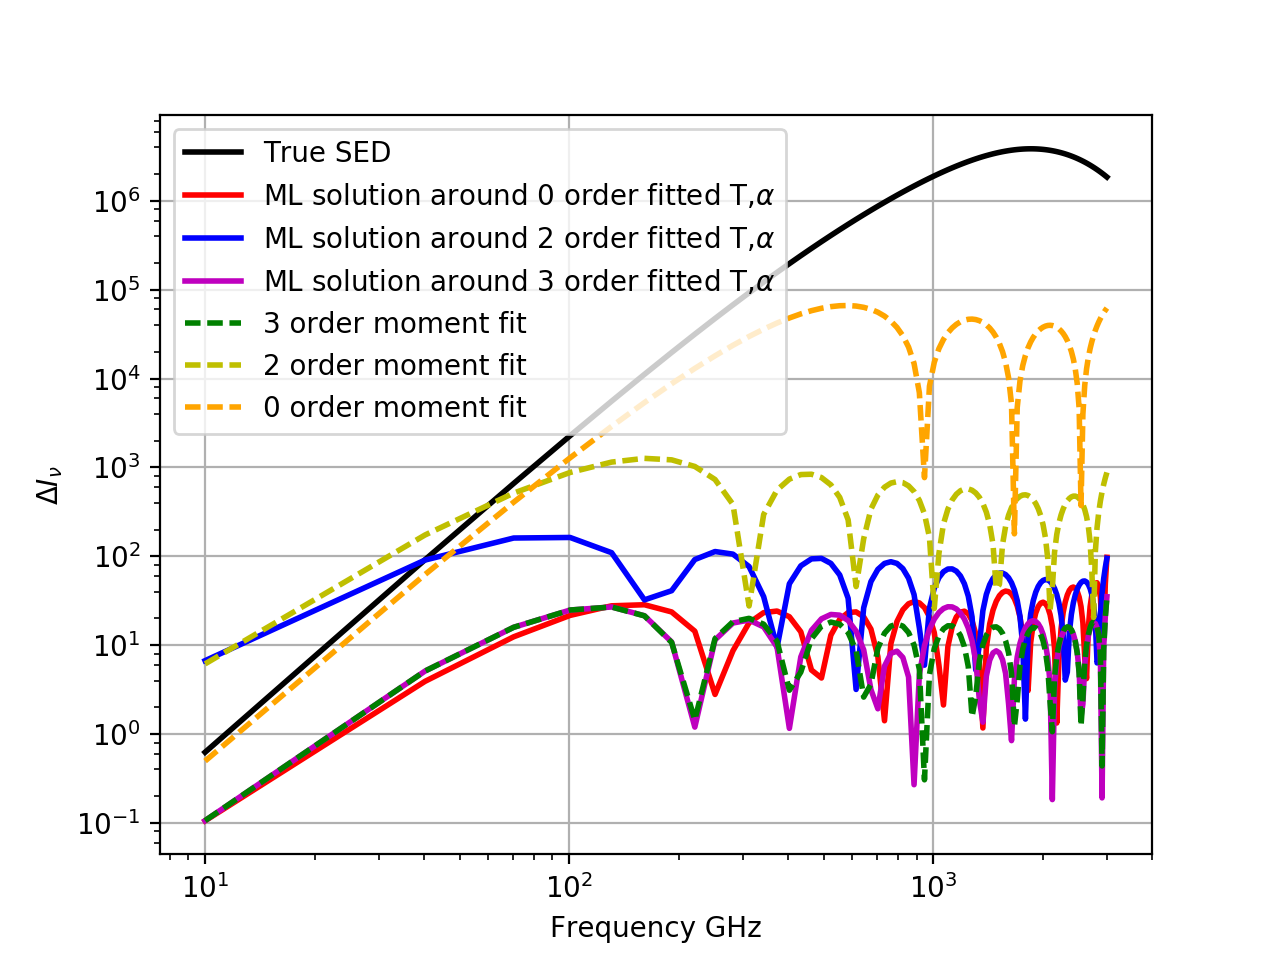

In [12]:
figure()
plot(nu,Inu,"k-",lw=2,label="True SED")
plot(nu,abs(Inu-rec_inu_0),"r-",lw=2,label=r"ML solution around 0 order fitted T,$\alpha$")
plot(nu,abs(Inu-rec_inu_2),"b-",lw=2,label=r"ML solution around 2 order fitted T,$\alpha$")
plot(nu,abs(Inu-rec_inu_3),"m-",lw=2,label=r"ML solution around 3 order fitted T,$\alpha$")
plot(x0,abs(Inu-mf.moment_expansion_function(nu,*par3)),"g--",lw=2,label="3 order moment fit")
plot(x0,abs(Inu-mf.moment_expansion_function(nu,*par2)),"y--",lw=2,label="2 order moment fit")
plot(x0,abs(Inu-mf.moment_expansion_function(nu,*par0)),"--",color="orange",lw=2,label="0 order moment fit")
xlabel("Frequency GHz")
ylabel(r"$\Delta I_{\nu}$")
legend(loc=0)
loglog()
grid()
savefig(figpath + "equivalence_all_param_optimization_vs_max_lh_clean_inc_1der.pdf")

# Construct SED from specified moments

In [13]:
par=[1e-3,16.,1.2,-5e-1,-2e-1,1e-1,3e-2,-4e-1,5e-2,-3e-1]
Inu=mf.moment_expansion_function(nu,*par)

In [ ]:
par0=mf.fit_monopole_sed(nu,Inu,0,bounds_true=True,prange=10,maxfev=200000) ; print par0
par2=mf.fit_monopole_sed(nu,Inu,2,bounds_true=True,prange=10,maxfev=200000) ; print par2
par3=mf.fit_monopole_sed(nu,Inu,3,bounds_true=True,maxfev=500000) ; print par3

In [214]:
moments,rec_inu_0=mlsoln.get_ml_moment_soln(nu,par0[1],par0[2],3,Inu,inc_1der=True)
print moments
moments,rec_inu_2=mlsoln.get_ml_moment_soln(nu,par2[1],par2[2],3,Inu,inc_1der=True)
print moments
moments,rec_inu_3=mlsoln.get_ml_moment_soln(nu,par3[1],par3[2],3,Inu,inc_1der=True)
print moments

[ 0.04803467 -0.01916504  0.02534485  0.01260376 -0.02212524 -0.00354385
 -0.00586319  0.0100174   0.00166035  0.00017381]
[ 0.03645325 -0.01088715  0.0195694   0.00802803 -0.01534653 -0.00217438
  0.00021362  0.00654221  0.00124502  0.00012454]
[  1.00708008e-03   7.62939453e-06   7.62939453e-06  -4.93049622e-04
  -2.00271606e-04   1.00374222e-04   3.12328339e-05  -4.01496887e-04
   4.98294830e-05  -3.00034881e-04]


In [48]:
err_cov=np.asarray(np.linalg.inv(np.matrix(cov_v)))
N_err_cov=zeros((num_moments,num_moments),float)

for i in range(num_moments):
    for j in range(i+1):
        N_err_cov[i,j]=err_cov[i,j]/(sqrt(err_cov[i,i])*sqrt(err_cov[j,j]))
        N_err_cov[j,i]=N_err_cov[i,j]

<IPython.core.display.Javascript object>


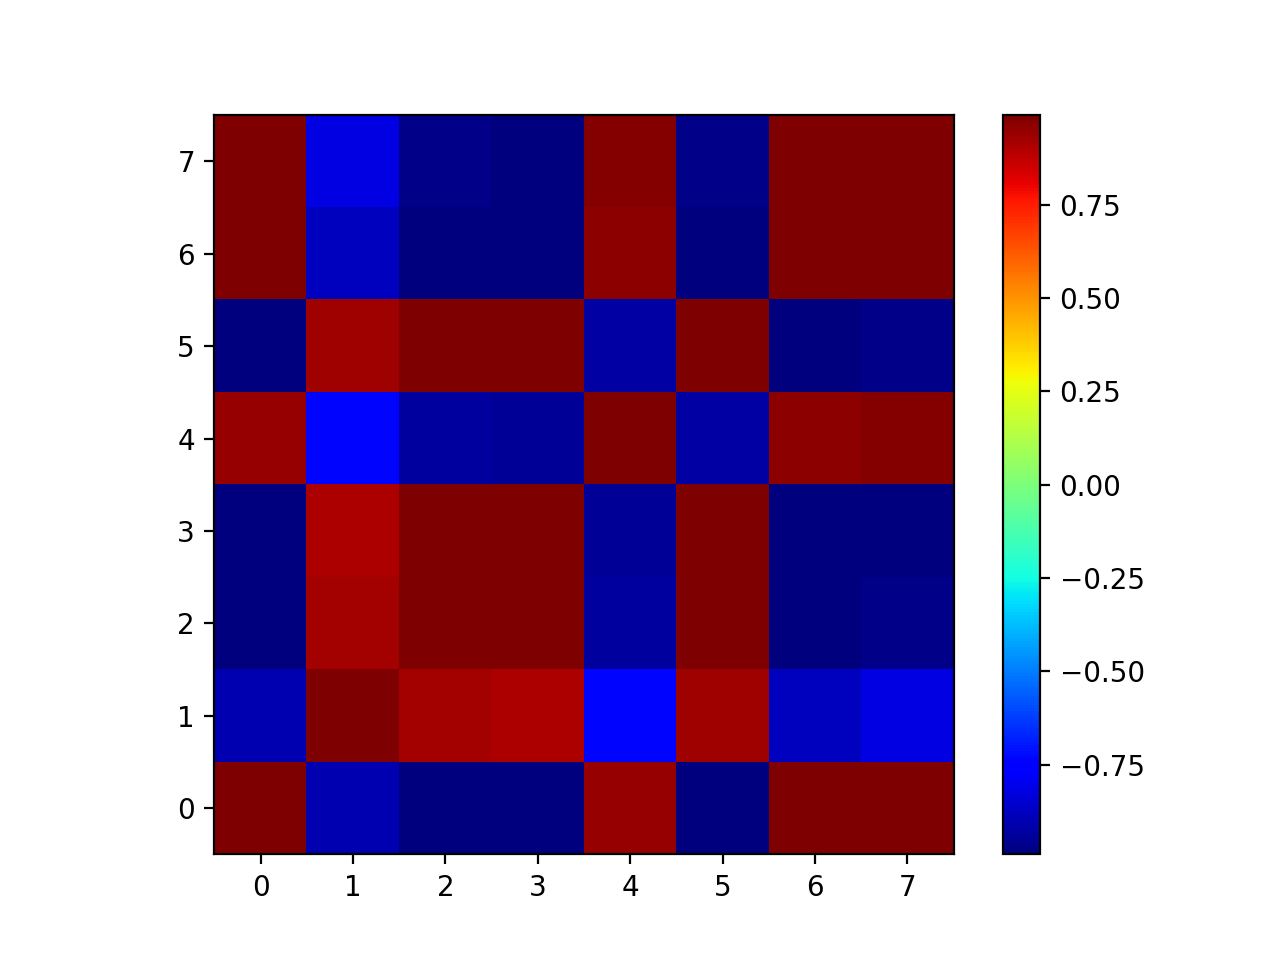

<IPython.core.display.Javascript object>


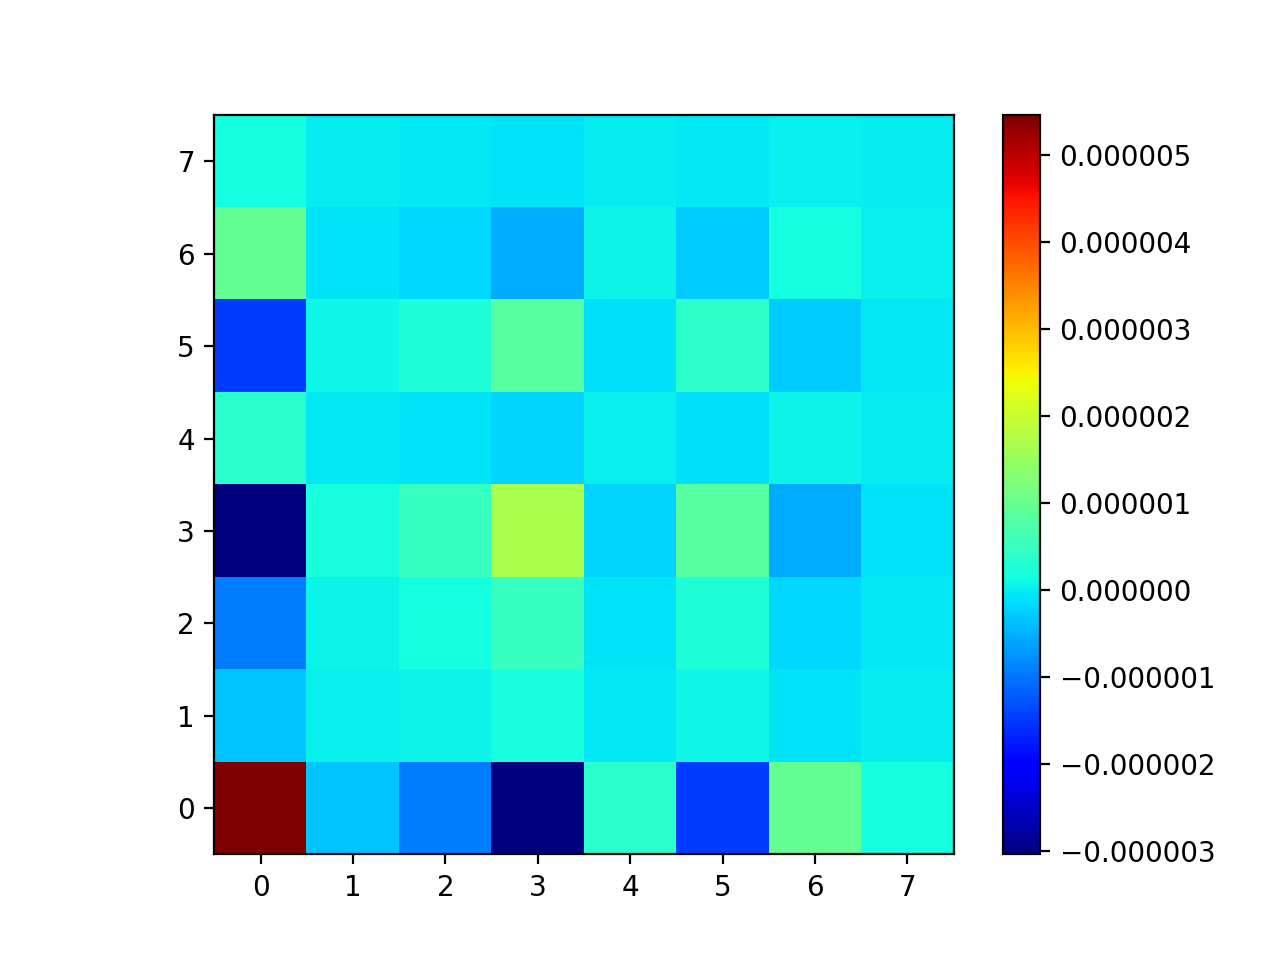

In [882]:
figure()
imshow(N_err_cov,vmin=-0.99,vmax=0.99,origin="lower")
colorbar()

figure()
imshow(err_cov,origin="lower")
colorbar()

<IPython.core.display.Javascript object>


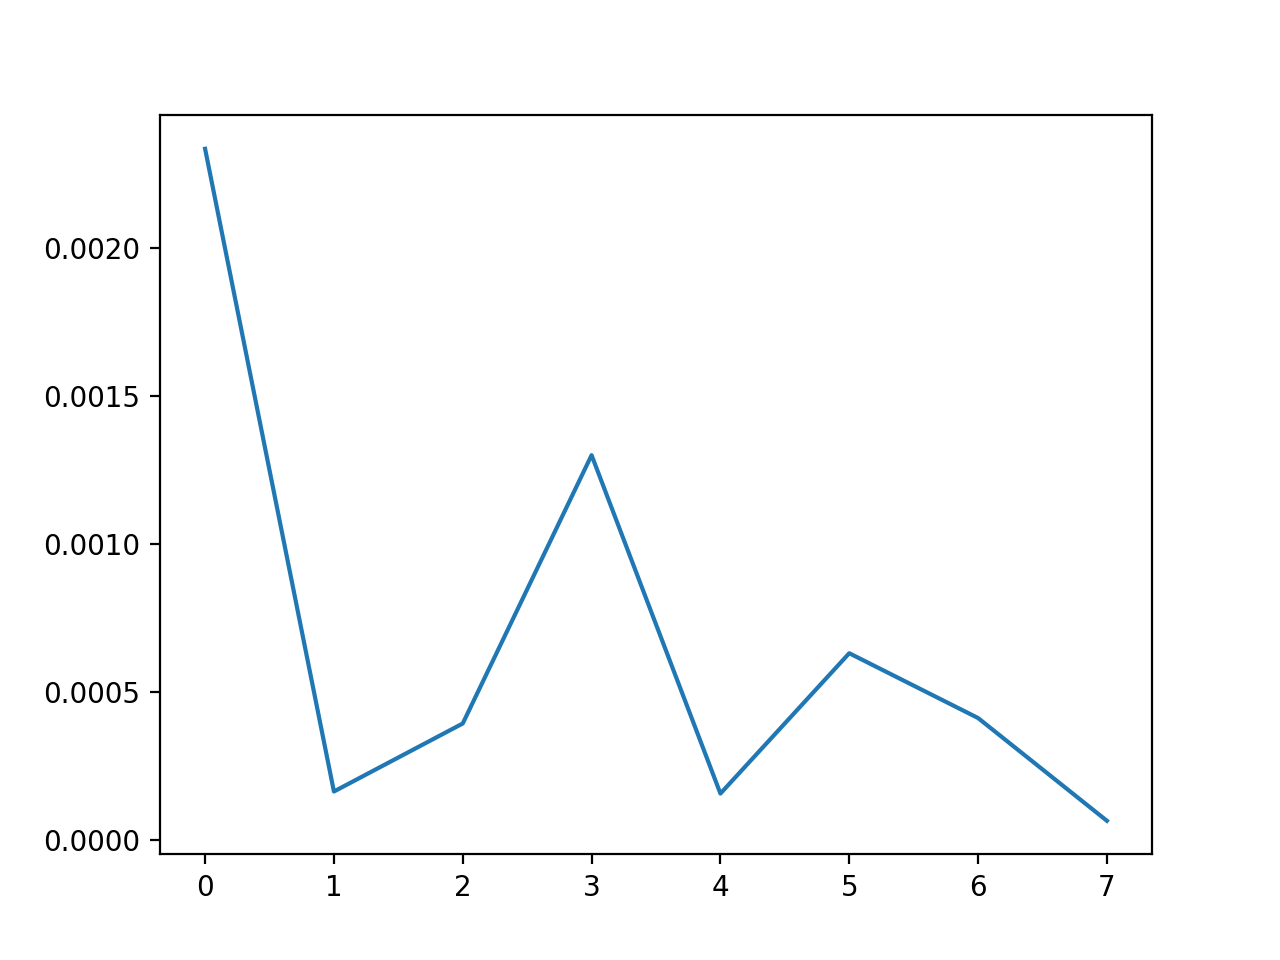

In [883]:
figure()
plot(sqrt(diag(err_cov)))

In [50]:
np.linalg.matrix_rank(err_cov)

8